In [2]:
#import files
import osmnx as ox
import os
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
from threading import Thread
matplotlib.use('Qt5Agg')


In [3]:
#Get the map of chandigarh
G = ox.graph_from_bbox(30.7728,30.6698,76.8202,76.6842, network_type='drive')  


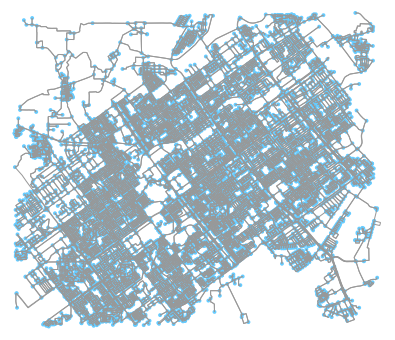

(<Figure size 491.1x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dac146df60>)

In [4]:
# projecting the graph
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)


In [5]:
#Save the graph
ox.save_graph_shapefile(G_projected,filename='chandigarh')


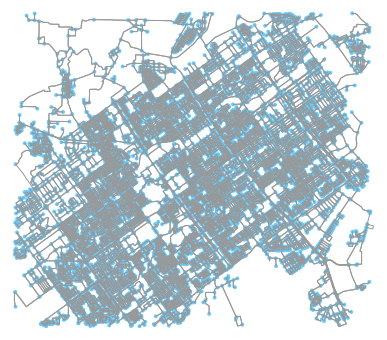

In [6]:
#loading the graph back
# G = ox.load_graphml('chandigarh.graphml')
fig, ax = ox.plot_graph(G)
ax.set_title('Chandigarh Map')
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (30.72331046,76.7449385))
dest_node = ox.get_nearest_node(G, (30.70527403,76.73457478))


In [7]:
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (30.72331046,76.7449385))
dest_node = ox.get_nearest_node(G, (30.70527403,76.73457478))


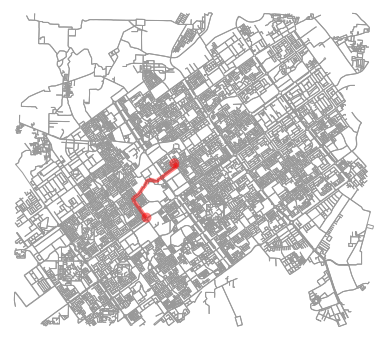

In [8]:
# find the route between these nodes using dijkstra then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)


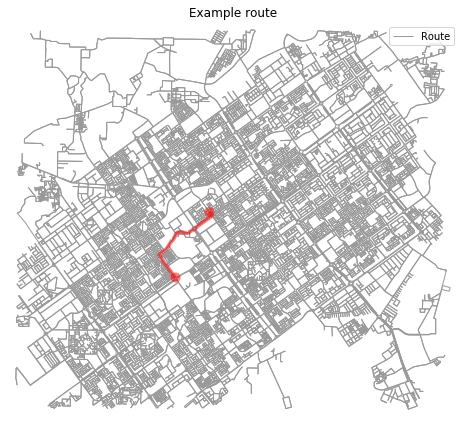

In [9]:
#display the route
ax.set_title('Example route')
ax.set_ylabel('Logitude')
ax.set_xlabel('Latitude')
ax.legend(['Route'])
fig.tight_layout()
fig


In [10]:
# display the length of the path
route = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
route

3156.001

In [11]:
# how far is it between these two nodes as the crow flies?
ox.great_circle_vec(30.72331046,76.7449385,
                    30.70527403,76.73457478)


2236.928885854331

In [12]:
#save the graph
ox.save_graphml(G, filename='Chandigarh.graphml')


In [13]:
#load the graph
G = ox.load_graphml('Chandigarh.graphml')


['Sheet1']
['Sheet1']


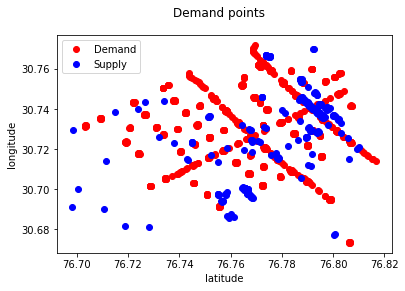

In [14]:
#read the supply and demand points
file = 'demand2.xlsx' #CHANGED: 'demand_compiled.xlsx'
demand = pd.ExcelFile(file)
print(demand.sheet_names)

df1 = demand.parse('Sheet1')
file1 = 'supply.xlsx'
supply= pd.ExcelFile(file1)
print(supply.sheet_names)
df2 = supply.parse('Sheet1')

fig = plt.figure('cube')
plt.plot(df1['Lon'], df1['Lat'], 'ro',label="Demand");
plt.plot(df2['Lon'], df2['Lat'], 'bo',label="Supply");
plt.legend(loc='upper left')
fig.suptitle('Demand points')
plt.xlabel("latitude");
plt.ylabel("longitude");


In [15]:
df2.size/3


291.0

In [16]:
# distance using the map is to generate the distance matrix of Demand X supply points
def Distance_using_map(df1,df2):
    time_value=0;    
    total=len(df1)
    D=np.zeros((len(df1),len(df2)), dtype=float);
    D-=1
    print(total)
    no_node=0;
    start = time.time()    
    for i in range(1,len(df1)):        
        orig_node = ox.get_nearest_node(G, (df1['Lat'][i],df1['Lon'][i]))
        temp=nx.shortest_path_length(G,orig_node, weight='length')
        for j in range(1,len(df2)):            
            dest_node = ox.get_nearest_node(G, (df2['Lat'][j],df2['Lon'][j]))
            try:
                D[i][j]=temp[dest_node];    
            except:
                D[i][j]=-1;
                print("Node not reachable"+str(no_node)+" "+str(i)+" "+str(j))
                no_node=no_node+1;                                
        print(total," ",D[i][1])
        total=total-1;
    end = time.time()
    time_value=end-start;
    return D*1000,time_value


In [17]:
# running the distance matrix 
# Iteration_no and distance of first element
D1,time_value=Distance_using_map(df1,df2)
print("total time taken= ",time_value)


803
803   10146.783000000001
802   10146.783000000001
801   10091.705000000002
800   10091.705000000002
799   10089.084
798   10159.373999999996
797   10159.373999999996
796   10136.463999999996
795   10136.463999999996
794   10211.255000000001
793   10196.856000000002
792   7940.001
791   7927.278
790   7879.456000000001
789   7867.880000000001
788   7817.245
787   7817.245
786   7972.474
785   7940.001
784   8498.706999999999
783   8498.706999999999
782   8456.349
781   8456.349
780   8409.006
779   8409.006
778   8385.647
777   8385.647
776   8559.744999999999
775   8545.893999999998
774   8513.067
773   8040.768000000002
772   8002.075000000003
771   7987.0080000000025
770   7936.875000000003
769   8104.107000000003
768   8090.311000000002
767   11710.262999999999
766   11703.238
765   11688.884999999998
764   11678.418999999998
763   11678.418999999998
762   11655.860999999999
761   11655.860999999999
760   11655.369999999999
759   11722.087999999998
758   7001.4929999999995
757  

428   5742.64
427   5716.603000000001
426   5716.603000000001
425   5689.650000000001
424   5873.671000000001
423   5873.671000000001
422   5850.818000000001
421   7392.3790000000035
420   7368.701000000003
419   7368.701000000003
418   7341.719000000003
417   7322.213000000003
416   7403.256000000003
415   7403.256000000003
414   7386.721000000003
413   7441.799000000003
412   7441.799000000003
411   7424.938000000003
410   6648.453000000001
409   6620.1370000000015
408   6620.1370000000015
407   6596.651000000002
406   6568.178000000002
405   6596.571000000001
404   6574.730000000001
403   6574.730000000001
402   6699.222000000002
401   6699.222000000002
400   6674.7930000000015
399   6648.453000000001
398   6189.097000000002
397   6163.415000000002
396   6163.415000000002
395   6141.944000000001
394   6113.482000000002
393   6296.080000000002
392   6296.080000000002
391   6269.125000000002
390   6238.524000000002
389   6238.524000000002
388   6228.505000000002
387   5335.43300000000

56   4321.795999999999
55   5081.753000000001
54   3676.1229999999996
53   4154.139999999999
52   5291.957000000001
51   4956.474
50   5021.574
49   5500.885000000001
48   5272.497000000001
47   5021.574
46   5216.517000000001
45   4717.566000000002
44   4633.281000000001
43   4329.192000000001
42   4607.705000000001
41   4546.282000000001
40   511.447
39   985.2509999999997
38   1164.339
37   511.447
36   729.6509999999998
35   729.6509999999998
34   1071.9619999999998
33   1842.303
32   3677.8210000000004
31   3317.2720000000004
30   2740.0449999999996
29   3313.226999999999
28   3313.226999999999
27   3024.6639999999998
26   3317.2720000000004
25   2008.108
24   2435.399
23   1814.639
22   10084.453999999996
21   9485.819999999996
20   9462.753999999997
19   9851.063999999997
18   9955.775999999996
17   4525.011000000001
16   6797.947000000002
15   6224.886000000003
14   793.4849999999998
13   741.1459999999998
12   647.712
11   637.2249999999999
10   637.2249999999999
9   991.61799

In [18]:
np.set_printoptions(threshold=np.inf)
D1


array([[-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.0000000e+03,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03, -1.00000

In [19]:
# some of the points are not reachable because of disconnection in graph for that reason they are given very large value.
D1.shape[0]
M=max(max(x) for x in D1)
for i in range(0,D1.shape[0]):
    for j in range(0,D1.shape[1]):
        if (D1[i,j]<=0):
            D1[i,j]=M;
M=min(min(x) for x in D1)
M


17714.000000000004

In [21]:
D1.size
# save the Distance matrix 
np.savetxt('test007.out', D1, delimiter=',')   # X is an array
#load the distance matrix
X = np.loadtxt('test007.out', delimiter=',')   # X is an array
X.shape



(803, 291)

In [27]:
D1.shape

(803, 291)

In [28]:
# manhattan distance for the Distance not much used 
def Distance_manhattan(df1,df2):
    D=np.zeros((len(df1),len(df2)), dtype=float);
    for i in range(len(df1)):
        for j in range(len(df2)):
            D[i][j]=abs(df1['Lat'][i]-df2['Lat'][j])+abs(df1['Lon'][i]-df2['Lon'][j])
    return D*1000


In [29]:
D=Distance_manhattan(df1,df2)


In [ ]:
#shape of the X is 
X=X/1000
X.shape

print("Average = ",np.average(X))
print("Max = ",np.max(X))
print("Min = ",np.min(X))

